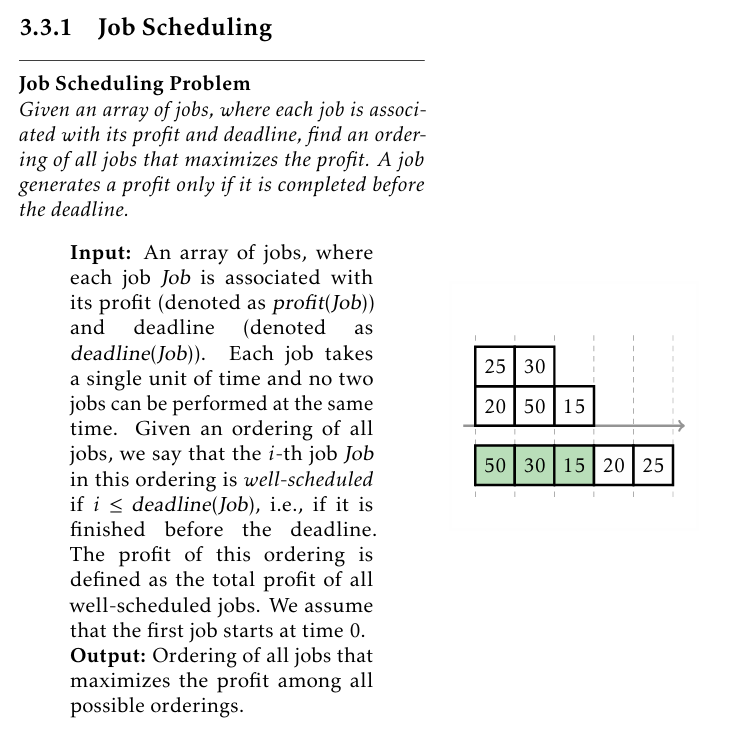

In [1]:
class Job:
    def __init__(self, profit, deadline):
        self.profit = profit
        self.deadline = deadline

def job_scheduling(jobs):
    # Sort jobs in decreasing order of profit
    jobs.sort(key=lambda x: x.profit, reverse=True)
    
    n = len(jobs)
    result = [None] * n  # To store result (scheduled jobs)
    time_slots = [False] * n  # To track available slots
    
    total_profit = 0
    
    # Go through each job and try to schedule it
    for job in jobs:
        # Find a slot for the job
        for t in range(min(n, job.deadline) - 1, -1, -1):
            if not time_slots[t]:
                result[t] = job
                time_slots[t] = True
                total_profit += job.profit
                break
                
    return total_profit, result

# Example usage
jobs = [Job(100, 2), Job(19, 1), Job(27, 2), Job(25, 1)]
profit, scheduled_jobs = job_scheduling(jobs)
print(f"Maximum profit: {profit}")
print("Scheduled jobs:")
for job in scheduled_jobs:
    if job:
        print(f"Profit: {job.profit}, Deadline: {job.deadline}")


Maximum profit: 127
Scheduled jobs:
Profit: 27, Deadline: 2
Profit: 100, Deadline: 2


Time Complexity:
Sorting the jobs takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
 is the number of jobs.
Checking for available slots for each job takes 
𝑂
(
𝑛
)
, 

leading to a total time complexity of 
𝑂
(
𝑛
log
⁡
𝑛
)
.

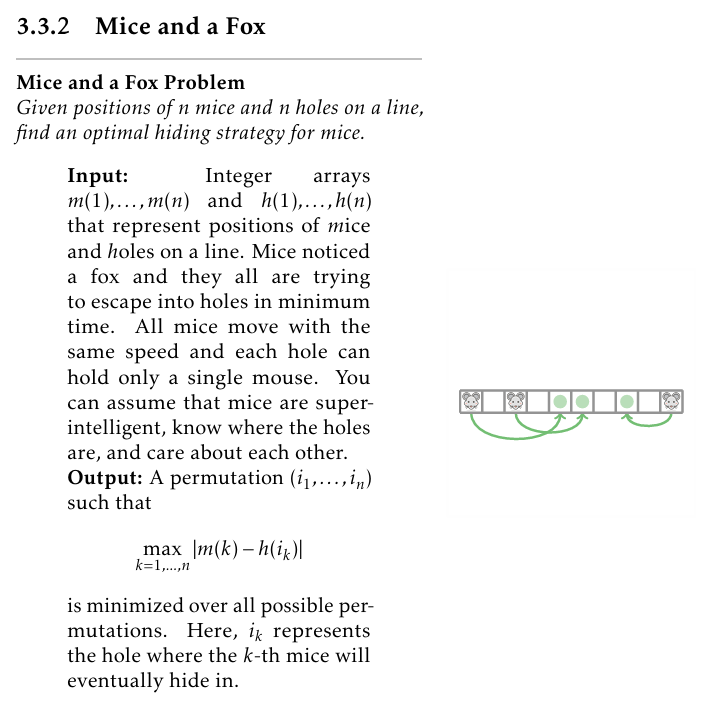

In [2]:
def mice_and_fox_problem(m, h):
    # Sort the positions of mice and holes
    m.sort()
    h.sort()

    # Calculate the maximum distance any mouse needs to travel
    max_distance = 0
    for i in range(len(m)):
        max_distance = max(max_distance, abs(m[i] - h[i]))

    return max_distance

# Example usage
mice_positions = [1, 3, 2]
holes_positions = [2, 3, 4]

result = mice_and_fox_problem(mice_positions, holes_positions)
print(f"Minimum time: {result}")


Minimum time: 1


Time Complexity:
Sorting both the mice and hole positions takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
 is the number of mice (or holes).
 
The overall time complexity is dominated by the sorting step: 
𝑂
(
𝑛
log
⁡
𝑛
)
.

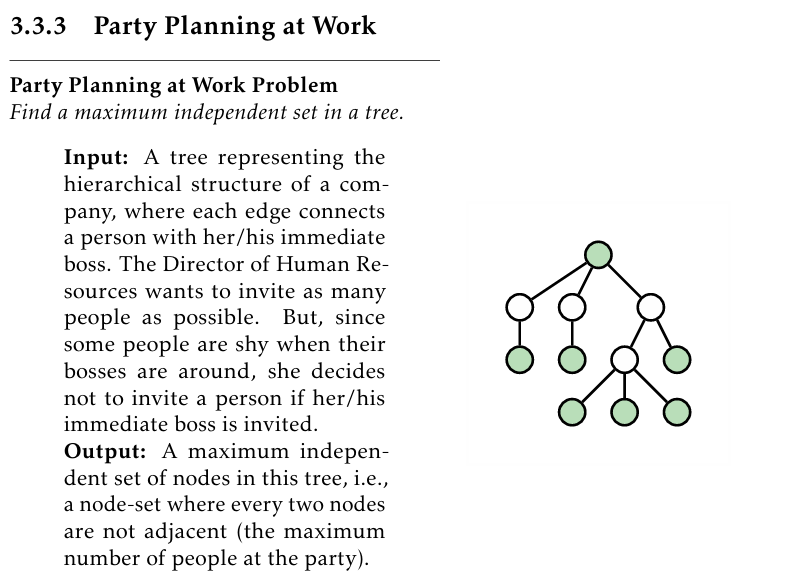

In [3]:
def party_planning_greedy(n, adj):
    # Initialize a list to store the independent set
    independent_set = set()
    visited = [False] * (n + 1)

    # Helper function to perform DFS and make decisions greedily
    def dfs(node, parent):
        visited[node] = True
        
        # If we can include this node in the independent set, we should do it greedily
        # (i.e., first try to include the current node)
        independent_set.add(node)
        
        # Now, we need to exclude its immediate neighbors
        for neighbor in adj[node]:
            if not visited[neighbor]:
                visited[neighbor] = True
                # Exclude the current node's neighbors from the independent set
                dfs(neighbor, node)
        
        # If we exclude the current node, we can include the neighbors
        # For each child, we decide to include or not based on the greedy strategy

    # Start DFS traversal from the root (node 1)
    dfs(1, -1)

    return independent_set


# Example Usage:
n = 5
# Adjacency list for the tree structure
adj = { 1: [2, 3], 2: [1, 4, 5], 3: [1], 4: [2], 5: [2] }

result = party_planning_greedy(n, adj)
print(f"Maximum independent set of people: {result}")


Maximum independent set of people: {1, 2, 3, 4, 5}


Complexity:
Time Complexity: The time complexity of this algorithm is 
𝑂
(
𝑛
)
, where 
𝑛
is the number of nodes in the tree. 


This is because we perform a depth-first search (DFS) and process each node exactly once.

Space Complexity: The space complexity is also 
𝑂
(
𝑛
)
 due to the storage required for the adjacency list and the visited nodes.

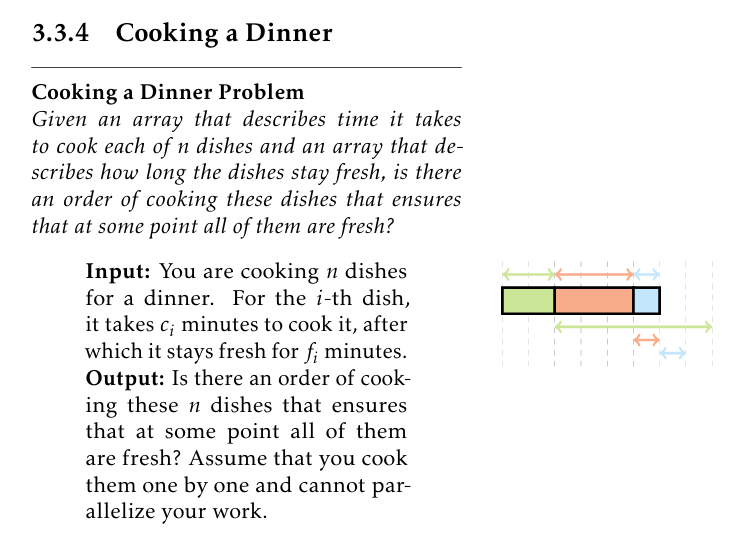

In [4]:
def can_all_dishes_be_fresh(n, cooking_times, freshness_times):
    # Create a list of tuples (cooking_time, freshness_time)
    dishes = [(cooking_times[i], freshness_times[i]) for i in range(n)]
    
    # Sort the dishes by their freshness time in ascending order
    dishes.sort(key=lambda x: x[1])

    current_time = 0  # Time when cooking starts
    
    # Simulate cooking the dishes in the sorted order
    for cooking_time, freshness_time in dishes:
        current_time += cooking_time  # Update the time after cooking this dish
        if current_time > freshness_time:  # Check if dish stays fresh
            return "NO"
    
    return "YES"


Time Complexity:
Sorting the dishes takes 
𝑂
(
𝑛
log
⁡
𝑛
)
, where 
𝑛
 is the number of dishes.

The simulation of the cooking process takes 
𝑂
(
𝑛
)
.

Therefore, the overall time complexity is O(n \log n) due to the sorting step.

Space Complexity:
We use an array to store the dishes and their properties, so the space complexity is O(n).

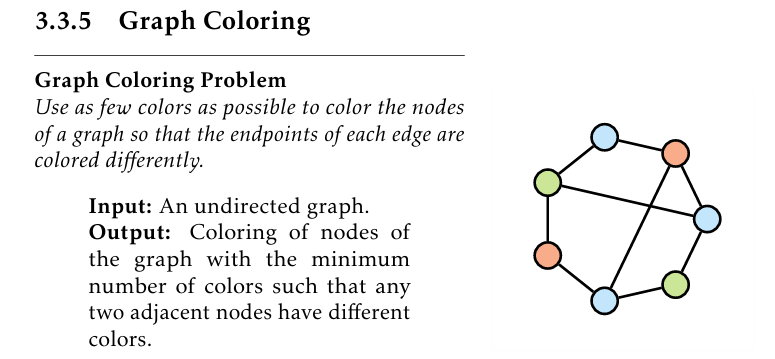

In [5]:
def graph_coloring(n, edges):
    # Step 1: Create an adjacency list
    adj = {i: [] for i in range(n)}
    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)
    
    # Step 2: Initialize a list to store the colors of the nodes
    colors = [-1] * n  # -1 means no color assigned yet
    
    # Step 3: Assign colors to each node
    for node in range(n):
        # Find the colors of the adjacent nodes
        adjacent_colors = set()
        for neighbor in adj[node]:
            if colors[neighbor] != -1:
                adjacent_colors.add(colors[neighbor])
        
        # Assign the smallest color not in adjacent_colors
        color = 0
        while color in adjacent_colors:
            color += 1
        colors[node] = color
    
    return colors


Time Complexity:

Adjacency list creation: O(m), where m is the number of edges.

Color assignment: For each node, we check all its neighbors (at most n neighbors). This leads to a time complexity of O(n + m).

The overall time complexity is O(n + m), where n is the number of nodes and m is the number of edges.

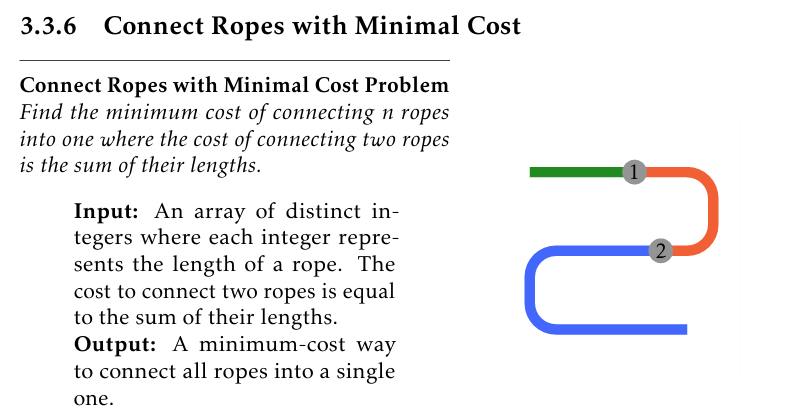

In [6]:
import heapq

def connect_ropes(ropes):
    # Step 1: Create a min-heap from the ropes
    heapq.heapify(ropes)
    
    total_cost = 0
    
    # Step 2: Combine ropes until only one rope is left
    while len(ropes) > 1:
        # Extract the two smallest ropes
        rope1 = heapq.heappop(ropes)
        rope2 = heapq.heappop(ropes)
        
        # Calculate the cost to combine them
        cost = rope1 + rope2
        total_cost += cost
        
        # Push the combined rope back into the heap
        heapq.heappush(ropes, cost)
    
    return total_cost


Time Complexity:

Building the heap: O(n), where n is the number of ropes.

Extracting and inserting elements into the heap: Each operation (heappop and heappush) takes O(log n),

and there are n-1 such operations (since each combination reduces the number of ropes by 1).

Therefore, the total time complexity is O(n log n), which is efficient for this problem.

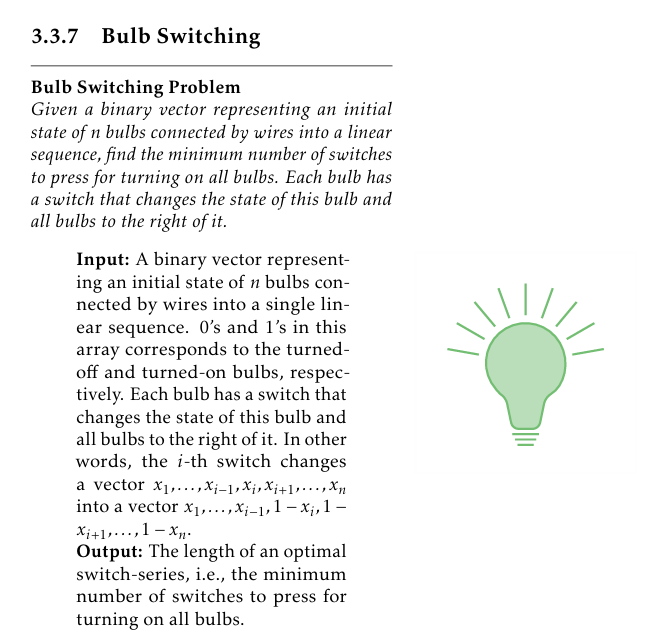

In [7]:
def bulbSwitching(bulbs):
    presses = 0
    # We need to track the current state of the bulbs
    current_state = 0
    
    # Iterate through the bulbs
    for i in range(len(bulbs)):
        # If the bulb's state doesn't match the current_state, press the switch
        if (bulbs[i] + current_state) % 2 == 0:  # Bulb is off, press the switch
            presses += 1
            current_state = 1 - current_state  # Toggle all subsequent bulbs
    
    return presses




Time complexity: The algorithm loops through the list of bulbs once, so the time complexity is O(n), where n is the number of bulbs.

Space complexity: The space complexity is O(1) because we only use a few extra variables.

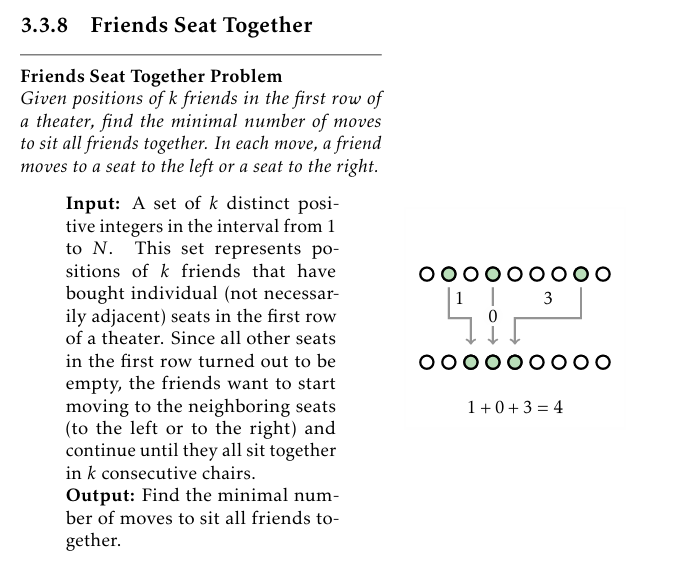

In [8]:
def minMovesToSeat(tickets, k):
    # Sort the positions of the friends
    tickets.sort()

    # Find the median position to minimize the total moves
    median_index = k // 2
    median_position = tickets[median_index]

    # Calculate the total number of moves required
    moves = 0
    for i in range(k):
        moves += abs(tickets[i] - (median_position + i - median_index))

    return moves


Time Complexity:
Sorting: The sorting step takes 
𝑂
(
𝑘
log
⁡
𝑘
)
, where 
𝑘
 is the number of friends.

Calculation of moves: Calculating the total number of moves takes 
𝑂
(
𝑘
)
. Thus, the overall time complexity is 
𝑂
(
𝑘
log
⁡
𝑘
)
.

Space complexity: The space complexity is 
𝑂
(
𝑘
)
 due to the sorted positions list.

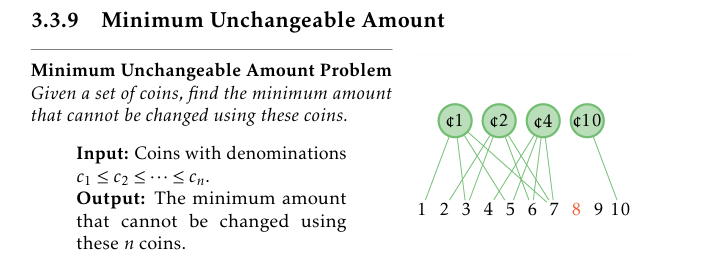

In [9]:
def minimumUnchangeableAmount(coins):
    smallest_unreachable = 1  # Initially, the smallest unachievable amount is 1
    
    for coin in coins:
        if coin > smallest_unreachable:
            break
        smallest_unreachable += coin
    
    return smallest_unreachable



Time Complexity:
Sorting the coins (if not already sorted) takes 
𝑂
(
𝑛
log
⁡
𝑛
)
.

The iteration through the coins is 
𝑂
(
𝑛
)
.
 Thus, the overall time complexity is 
𝑂
(
𝑛
log
⁡
𝑛
)
, primarily due to sorting.

The space complexity is 
𝑂
(
1
)
 because we are using only a few variables.